# Image classification with Vision Transformer

**Author:** [Khalid Salama](https://www.linkedin.com/in/khalid-salama-24403144/)<br>
**Date created:** 2021/01/18<br>
**Last modified:** 2021/01/18<br>
**Description:** Implementing the Vision Transformer (ViT) model for image classification.

## Introduction

This example implements the [Vision Transformer (ViT)](https://arxiv.org/abs/2010.11929)
model by Alexey Dosovitskiy et al. for image classification,
and demonstrates it on the CIFAR-100 dataset.
The ViT model applies the Transformer architecture with self-attention to sequences of
image patches, without using convolution layers.

## Setup

In [1]:
import os

os.environ["KERAS_BACKEND"] = "jax"  # @param ["tensorflow", "jax", "torch"]

import keras
from keras import layers
from keras import ops

import numpy as np
import matplotlib.pyplot as plt

## Prepare the data

In [2]:
num_classes = 5
input_shape = (256, 256, 3)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from PIL import Image
import glob
import numpy as np

# Define the target image size
image_size = 256

filelist1 = glob.glob('/content/drive/MyDrive/TypeCoffee.v25i.folder/test/DuroRiadoRio/*.jpg')

xt_drr = np.array([np.array(Image.open(fname)) for fname in filelist1])
print(xt_drr.shape)
yt_drr = np.zeros((19,1),dtype=np.uint8)

filelist2 = glob.glob('/content/drive/MyDrive/TypeCoffee.v25i.folder/test/Mole/*.jpg')

xt_mole = np.array([np.array(Image.open(fname)) for fname in filelist2])
yt_mole = np.ones((19,1),dtype=np.uint8)

filelist3 = glob.glob('/content/drive/MyDrive/TypeCoffee.v25i.folder/test/Quebrado/*.jpg')

xt_q = np.array([np.array(Image.open(fname)) for fname in filelist3])
yt_q= np.full((20,1),2,dtype=np.uint8)

filelist4 = glob.glob('/content/drive/MyDrive/TypeCoffee.v25i.folder/test/RiadoRio/*.jpg')

xt_rr = np.array([np.array(Image.open(fname)) for fname in filelist4])
yt_rr= np.full ((22,1),3,dtype=np.uint8)

filelist5 = glob.glob('/content/drive/MyDrive/TypeCoffee.v25i.folder/test/RioFechado/*.jpg')

xt_rf = np.array([np.array(Image.open(fname)) for fname in filelist5])
yt_rf= np.full ((20,1),4,dtype=np.uint8)

x_test=np.concatenate((xt_drr,xt_mole,xt_q,xt_rr,xt_rf), axis=0)
y_test=np.concatenate((yt_drr,yt_mole,yt_q,yt_rr,yt_rf), axis=0)

print(x_test.shape)
print(y_test.shape)

(19, 256, 256, 3)
(100, 256, 256, 3)
(100, 1)


In [17]:
filelist6 = glob.glob('/content/drive/MyDrive/TypeCoffee.v25i.folder/train/DuroRiadoRio/*.jpg')

xtrain_drr = np.array([np.array(Image.open(fname)) for fname in filelist6])
ytrain_drr = np.zeros((210,1),dtype=np.uint8)

filelist7 = glob.glob('/content/drive/MyDrive/TypeCoffee.v25i.folder/train/Mole/*.jpg')

xtrain_mole = np.array([np.array(Image.open(fname)) for fname in filelist7])
ytrain_mole = np.ones((215,1),dtype=np.uint8)

filelist8 = glob.glob('/content/drive/MyDrive/TypeCoffee.v25i.folder/train/Quebrado/*.jpg')

xtrain_q = np.array([np.array(Image.open(fname)) for fname in filelist8])
ytrain_q= np.full((206,1),2,dtype=np.uint8)

filelist9 = glob.glob('/content/drive/MyDrive/TypeCoffee.v25i.folder/train/RiadoRio/*.jpg')

xtrain_rr = np.array([np.array(Image.open(fname)) for fname in filelist9])
ytrain_rr= np.full ((212,1),3,dtype=np.uint8)

filelist10 = glob.glob('/content/drive/MyDrive/TypeCoffee.v25i.folder/train/RioFechado/*.jpg')

xtrain_rf = np.array([np.array(Image.open(fname)) for fname in filelist10])
ytrain_rf= np.full ((206,1),4,dtype=np.uint8)

x_train=np.concatenate((xtrain_drr,xtrain_mole,xtrain_q,xtrain_rr,xtrain_rf), axis=0)
y_train=np.concatenate((ytrain_drr,ytrain_mole,ytrain_q,ytrain_rr,ytrain_rf), axis=0)

print(x_train.shape)
print(y_train.shape)

(1049, 256, 256, 3)
(1049, 1)


In [6]:
filelist11 = glob.glob('/content/drive/MyDrive/TypeCoffee.v25i.folder/val/DuroRiadoRio/*.jpg')

xv_drr = np.array([np.array(Image.open(fname)) for fname in filelist11])
yv_drr = np.zeros((13,1),dtype=np.uint8)

filelist12 = glob.glob('/content/drive/MyDrive/TypeCoffee.v25i.folder/val/Mole/*.jpg')

xv_mole = np.array([np.array(Image.open(fname)) for fname in filelist12])
yv_mole = np.ones((11,1),dtype=np.uint8)

filelist13 = glob.glob('/content/drive/MyDrive/TypeCoffee.v25i.folder/val/Quebrado/*.jpg')

xv_q = np.array([np.array(Image.open(fname)) for fname in filelist13])
yv_q= np.full((13,1),2,dtype=np.uint8)

filelist14 = glob.glob('/content/drive/MyDrive/TypeCoffee.v25i.folder/val/RiadoRio/*.jpg')

xv_rr = np.array([np.array(Image.open(fname)) for fname in filelist14])
yv_rr= np.full ((10,1),3,dtype=np.uint8)

filelist15 = glob.glob('/content/drive/MyDrive/TypeCoffee.v25i.folder/val/RioFechado/*.jpg')

xv_rf = np.array([np.array(Image.open(fname)) for fname in filelist15])
yv_rf= np.full ((13,1),4,dtype=np.uint8)

x_val=np.concatenate((xv_drr,xv_mole,xv_q,xv_rr,xv_rf), axis=0)
y_val=np.concatenate((yv_drr,yv_mole,yv_q,yv_rr,yv_rf), axis=0)

print(x_val.shape)
print(y_val.shape)

(60, 256, 256, 3)
(60, 1)


## Configure the hyperparameters

In [18]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 32 #ESTAVA 256
num_epochs = 100  # For real training, use num_epochs=100. 10 is a test value
image_size = 256  # We'll resize input images to this size
patch_size = 32  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [
    2048,
    1024,
]  # Size of the dense layers of the final classifier


## Use data augmentation

In [19]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)


## Implement multilayer perceptron (MLP)

In [20]:

def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=keras.activations.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


## Implement patch creation as a layer

In [21]:

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        #acrescentei a linha abaixo em 30-04
        images = ops.cast(images, dtype='float32')
        input_shape = ops.shape(images)
        batch_size = input_shape[0]
        height = input_shape[1]
        width = input_shape[2]
        channels = input_shape[3]
        num_patches_h = height // self.patch_size
        num_patches_w = width // self.patch_size
        patches = keras.ops.image.extract_patches(images, size=self.patch_size)
        patches = ops.reshape(
            patches,
            (
                batch_size,
                num_patches_h * num_patches_w,
                self.patch_size * self.patch_size * channels,
            ),
        )
        return patches

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config


Let's display patches for a sample image

Image size: 256 X 256
Patch size: 32 X 32
Patches per image: 64
Elements per patch: 3072


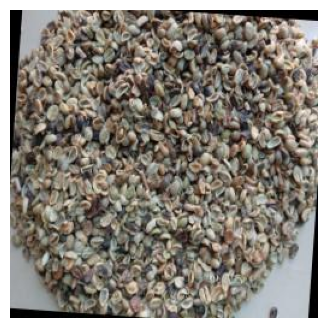

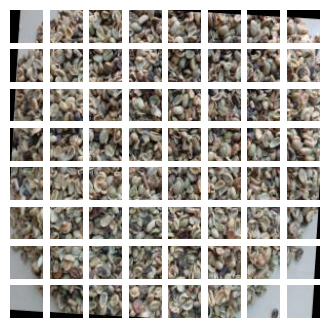

In [22]:
plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = ops.image.resize(
    ops.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = ops.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(ops.convert_to_numpy(patch_img).astype("uint8"))
    plt.axis("off")

## Implement the patch encoding layer

The `PatchEncoder` layer will linearly transform a patch by projecting it into a
vector of size `projection_dim`. In addition, it adds a learnable position
embedding to the projected vector.

In [23]:

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = ops.expand_dims(
            ops.arange(start=0, stop=self.num_patches, step=1), axis=0
        )
        projected_patches = self.projection(patch)
        encoded = projected_patches + self.position_embedding(positions)
        return encoded

    def get_config(self):
        config = super().get_config()
        config.update({"num_patches": self.num_patches})
        return config


## Build the ViT model

The ViT model consists of multiple Transformer blocks,
which use the `layers.MultiHeadAttention` layer as a self-attention mechanism
applied to the sequence of patches. The Transformer blocks produce a
`[batch_size, num_patches, projection_dim]` tensor, which is processed via an
classifier head with softmax to produce the final class probabilities output.

Unlike the technique described in the [paper](https://arxiv.org/abs/2010.11929),
which prepends a learnable embedding to the sequence of encoded patches to serve
as the image representation, all the outputs of the final Transformer block are
reshaped with `layers.Flatten()` and used as the image
representation input to the classifier head.
Note that the `layers.GlobalAveragePooling1D` layer
could also be used instead to aggregate the outputs of the Transformer block,
especially when the number of patches and the projection dimensions are large.

In [24]:

def create_vit_classifier():
    inputs = keras.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model


## Compile, train, and evaluate the mode

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.2277 - loss: 3.6928 - top-5-accuracy: 1.0000 - val_accuracy: 0.1238 - val_loss: 3.2140 - val_top-5-accuracy: 1.0000
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.3154 - loss: 2.4152 - top-5-accuracy: 1.0000 - val_accuracy: 0.0286 - val_loss: 2.1623 - val_top-5-accuracy: 1.0000
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.2861 - loss: 1.7062 - top-5-accuracy: 1.0000 - val_accuracy: 0.0095 - val_loss: 1.9844 - val_top-5-accuracy: 1.0000
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.3168 - loss: 1.5991 - top-5-accuracy: 1.0000 - val_accuracy: 0.0000e+00 - val_loss: 2.4807 - val_top-5-accuracy: 1.0000
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.3470 - loss: 1.5423 - top-5-accuracy: 1.0000 - val_accuracy: 0.0000e+00 - val_loss: 2.1185 - val_top-5-accuracy: 1.0000
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.3390 - loss: 1.5202 - 

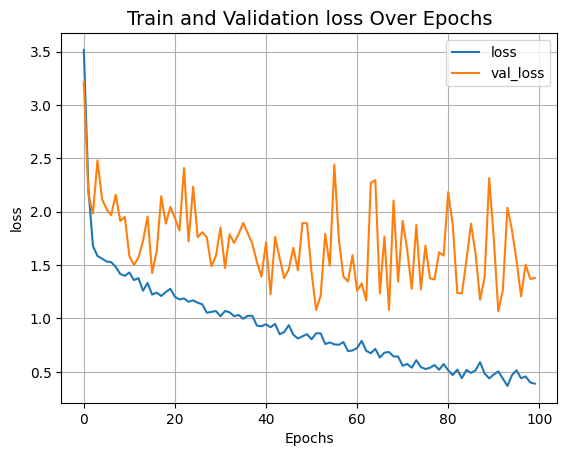

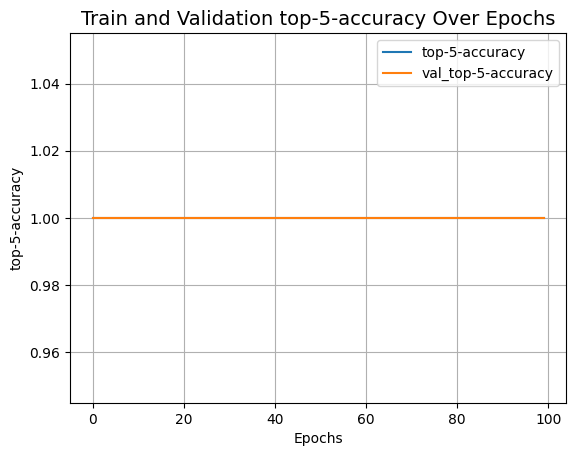

In [25]:
def run_experiment(model):
    optimizer = keras.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint.weights.h5"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)


def plot_history(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_history("loss")
plot_history("top-5-accuracy")

In [26]:
!pip install scikit-learn # Install scikit-learn if you haven't already

from sklearn.metrics import precision_recall_fscore_support # Import the function
import numpy as np

y_true = []
y_pred = []
for images, labels in zip(x_test, y_test):
  predictions = vit_classifier.predict(np.expand_dims(images, axis=0))  # Predict on a single image
  predicted_label = np.argmax(predictions, axis=1)[0]  # Get the predicted label
  y_true.append(labels[0])  # Assuming label is a single-element array
  y_pred.append(predicted_label)

precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [27]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Import the preprocess_input function
from keras.applications.imagenet_utils import preprocess_input

# Lista para armazenar tempos de inferência
tempos_de_inferencia = []

# Caminho das imagens para inferência
caminho_dados = "/content/drive/MyDrive/TypeCoffee.v28i.folder/train/Mole/"
imagens = [os.path.join(caminho_dados, nome) for nome in os.listdir(caminho_dados)]

# Make sure you've defined or loaded 'model' before this loop
model = create_vit_classifier()

for imagem in imagens:
    inicio = time.time()  # Marca o início do processo
   # Load the image and preprocess it
    img = tf.keras.utils.load_img(imagem, target_size=(256, 256))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array = preprocess_input(img_array)  # Apply preprocessing if necessary

    predictions = model.predict(img_array)  # Make predictions

    # You can process 'predictions' here, such as getting the class with highest probability
    predicted_class_index = np.argmax(predictions[0])

    fim = time.time()

    # Calcula o tempo de inferência
    tempos_de_inferencia.append(fim - inicio)

# Cálculo da média dos tempos
media_tempo_inferencia = np.mean(tempos_de_inferencia)

print(f"Média do tempo de inferência: {media_tempo_inferencia:.4f} segundos")

NameError: name 'vision_transformer_classifier' is not defined

In [29]:
import torch
torch.save(create_vit_classifier, 'meu_modelo_vit.pt')

After 100 epochs, the ViT model achieves around 55% accuracy and
82% top-5 accuracy on the test data. These are not competitive results on the CIFAR-100 dataset,
as a ResNet50V2 trained from scratch on the same data can achieve 67% accuracy.

Note that the state of the art results reported in the
[paper](https://arxiv.org/abs/2010.11929) are achieved by pre-training the ViT model using
the JFT-300M dataset, then fine-tuning it on the target dataset. To improve the model quality
without pre-training, you can try to train the model for more epochs, use a larger number of
Transformer layers, resize the input images, change the patch size, or increase the projection dimensions.
Besides, as mentioned in the paper, the quality of the model is affected not only by architecture choices,
but also by parameters such as the learning rate schedule, optimizer, weight decay, etc.
In practice, it's recommended to fine-tune a ViT model
that was pre-trained using a large, high-resolution dataset.